In [ ]:
%pip install --upgrade scikit-learn pandas tensorflow matplotlib


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [26]:
data = pd.read_excel("PROJECT DATASET.xlsx")  # Replace "your_dataset.csv" with the actual dataset file path


In [28]:
X = data["title"]
y = data["retweet"]  # Assuming "Trend" is the column indicating whether the article trended or not


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

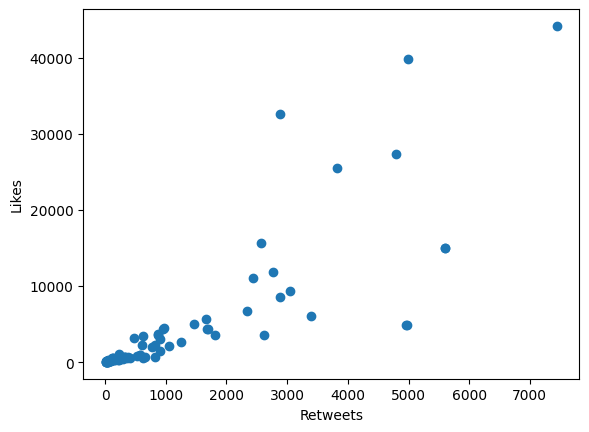

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_excel('PROJECT DATASET.xlsx')

# Create a scatter plot of retweets versus likes
plt.scatter(df['retweet'], df['like'])

# Label the axes
plt.xlabel('Retweets')
plt.ylabel('Likes')

# Display the plot
plt.show()


In [30]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the number of features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
X_train_tfidf_np = X_train_tfidf.toarray()
X_test_tfidf_np = X_test_tfidf.toarray()


In [31]:
tfidf_vectorizer

TfidfVectorizer(max_features=1000)

In [32]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_tfidf.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')  # Binary classification, so we use sigmoid activation
])


In [33]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model


In [34]:
# Then, you can use these NumPy arrays for training
history = model.fit(X_train_tfidf_np, y_train, epochs=30, batch_size=10, validation_split=0.2, verbose=True)

Epoch 1/30
6/6 [==============================] - 1s 40ms/step - loss: 31.6235 - accuracy: 0.0000e+00 - val_loss: -58.7347 - val_accuracy: 0.0000e+00
Epoch 2/30
6/6 [==============================] - 0s 8ms/step - loss: -93.3670 - accuracy: 0.0000e+00 - val_loss: -169.1521 - val_accuracy: 0.0000e+00
Epoch 3/30
6/6 [==============================] - 0s 11ms/step - loss: -246.0114 - accuracy: 0.0000e+00 - val_loss: -291.9020 - val_accuracy: 0.0000e+00
Epoch 4/30
6/6 [==============================] - 0s 10ms/step - loss: -428.7094 - accuracy: 0.0000e+00 - val_loss: -442.6565 - val_accuracy: 0.0000e+00
Epoch 5/30
6/6 [==============================] - 0s 10ms/step - loss: -611.1556 - accuracy: 0.0000e+00 - val_loss: -633.4666 - val_accuracy: 0.0000e+00
Epoch 6/30
6/6 [==============================] - 0s 11ms/step - loss: -890.8868 - accuracy: 0.0000e+00 - val_loss: -879.8724 - val_accuracy: 0.0000e+00
Epoch 7/30
6/6 [==============================] - 0s 11ms/step - loss: -1254.9873 - acc

In [35]:

# Convert the sparse CSR matrix to a dense NumPy array
X_test_tfidf_np = X_test_tfidf.toarray()

# Now, you can evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_tfidf_np, y_test)
print("Test Accuracy:", test_accuracy)

1/1 [==============================] - 0s 36ms/step - loss: -175721.7188 - accuracy: 0.0000e+00
Test Accuracy: 0.0


In [40]:
new_titles = ["hrlllo what's up today", 'our present dies at the same time']
new_titles_tfidf = tfidf_vectorizer.transform(new_titles)
# Convert the sparse CSR matrix to a dense NumPy array
new_titles_tfidf_np = new_titles_tfidf.toarray()

# Reorder the sparse matrix
new_titles_tfidf_sparse = tf.sparse.reorder(tf.sparse.from_dense(new_titles_tfidf_np))

# Make predictions using the model
predictions = model.predict(new_titles_tfidf_np)


# Convert the prediction to a binary label (e.g., 1 for trending, 0 for not trending)
print(predictions)
for result in predictions:     
        predicted_labels = (result > 0.5).astype(int)
        print("This article will trend" if  predicted_labels[0] > 0 else "This article will not trend")

1/1 [==============================] - 0s 25ms/step
[[1.]
 [1.]]
This article will trend
This article will trend
